# Kartik Gupta
## 102083047
## COE-25

### Libraries Import

In [62]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import xgboost as xg
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

# Dataset Import 

In [63]:
dataset = pd.read_excel('DATASET.xlsx')

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  101 non-null    object 
 1   year        1009 non-null   int64  
 2   Para-1      1009 non-null   float64
 3   Para-2      1009 non-null   float64
 4   Para-3      1009 non-null   float64
 5   Para-4      1009 non-null   float64
 6   Para-5      1009 non-null   int64  
 7   Para-6      1009 non-null   int64  
 8   Para-7      1009 non-null   int64  
 9   Para-8      1009 non-null   int64  
 10  Para-9      1009 non-null   float64
 11  Para-10     1009 non-null   float64
 12  Para-11     1009 non-null   float64
 13  Para-12     1009 non-null   int64  
 14  Para-13     1007 non-null   float64
dtypes: float64(8), int64(6), object(1)
memory usage: 118.4+ KB


In [65]:

j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

### Data Preprocessing

In [66]:
#Renaming first column
dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Group')

In [67]:
#Replacing empty cells with zero
dataset.fillna(0, inplace=True)

In [68]:
#Test Dataset
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [69]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Group')

In [70]:
dataset.head(12)

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.810
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.860
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.890
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.920
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960


## Model Definition 

In [71]:
xgb=xg.XGBRegressor(n_estimators=100,seed=111)

## Model Application

In [80]:
def selectedModel():
    RMSE = []
    N = 0
    index = 0
    for j in [10, 11, 12, 13, 14]:
        ans = 0
        count = 0
        for i in range(0, 1000, 10):
            #Extracting Train and Test Data
            xtrain = dataset.iloc[i:i+9, 1:10]
            ytrain = dataset.iloc[i:i+9, j]
            xtest = dataset.iloc[i+9, 1:10].to_numpy()
            ytest = dataset.iloc[i+9, j]
            xgb.fit(xtrain, ytrain)
            ypred = xgb.predict(xtest.reshape(1,-1))[0]
            result[predict_col_names[index]].append(ypred)
            ans += (ytest - ypred)**2
            count += 1
            N += 1
        RMSE.append(ans)
        index += 1
    return (RMSE, count)

In [81]:
#Applying XGBoost regressor
result_RMSE, result_count = selectedModel()

In [82]:
dataset_predicted = pd.DataFrame.from_dict(result)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.398811e+00,6.049885e+01,5.699891e+01,7.999336,1.918818
1,6.089891e+01,3.019855e+01,9.993413e-01,7.999299,0.792745
2,7.539892e+01,1.074621e-14,1.074621e-14,13.998545,1.412780
3,2.479873e+01,5.698064e+01,6.399891e+01,7.999380,1.887874
4,1.074621e-14,2.617977e+02,3.399949e+01,5.999571,1.768963
...,...,...,...,...,...
196,1.074621e-14,3.724359e+00,8.026345e+00,2.000383,1.083702
197,1.210031e+01,1.151069e+02,1.000359e+00,5.000604,1.236305
198,2.326158e-04,2.383119e+01,9.031749e+00,10.000438,1.017857
199,8.924767e-04,9.315204e+00,2.191541e+00,8.000424,0.612125


## RMSE Calculations- 

In [83]:
#RMSE for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

40.26212257488777
35.39758095733366
14.477382703514
13.756020060932176
0.20760239462907404


In [84]:
#Total RMSE
print((sum(result_RMSE)/500)**0.5)

25.584733918809114


## Result Plots 

In [85]:
#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

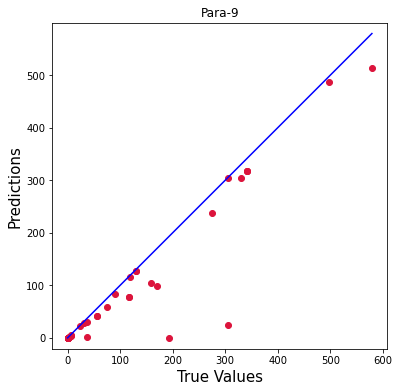

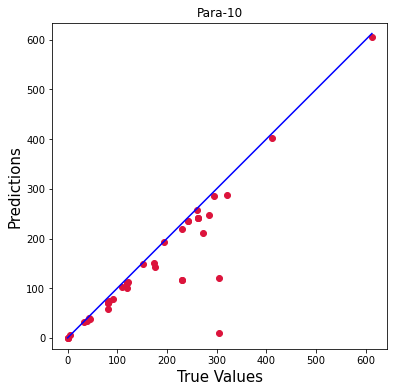

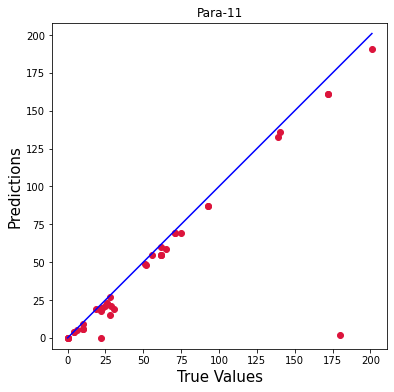

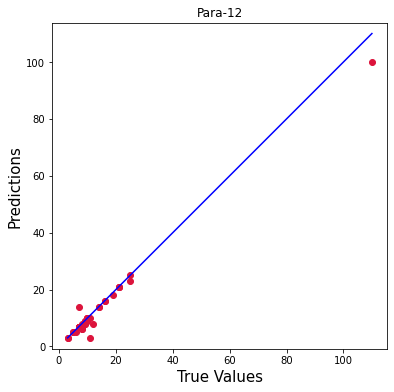

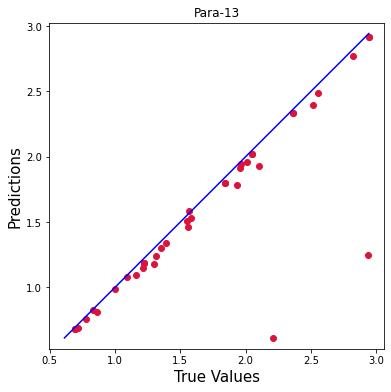

In [86]:
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')
    # plt.yscale('log')
    # plt.xscale('log')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()